In [1]:
import pandas as pd
import pprint as pprint
import sys
from utils_iaa import analyze_all_cases, analyze_cases, process_annotations_and_disagreements, visualize_and_write_final_df, prepare_df

# Linguistic Synesthesia - yes or no?

In [2]:
eliot_corner_cases = [
    "A dull head among windy spaces.",
    "A lonely cab-horse steams and stamps.",
    "But through the water pale and thin \nStill shine the unoffending feet",
    "Defunctive music under sea",
    "Every street lamp that I pass \nBeats like a fatalistic drum",
    "Except when a street piano, mechanical and tired\nReiterates some worn-out common song\nWith the smell of hyacinths across the garden",
    "Faced by the snarled and yelping seas.",
    "He is merely flesh and blood.",
    "Her hand twists a paper rose,\nThat smells of dust and old Cologne",
    "Performing on a harp of gold.",
    "the floors of silent seas.",
    "The morning comes to consciousness \nOf faint stale smells of beer\nFrom the sawdust-trampled street",
    "The reminiscence comes\nOf sunless dry geraniums",
    "These tears are shaken from the wrath-bearing tree.",
    "Where worried bodies of drowned men drift down in the green silence"
]

dickinson_corner_cases = [
    "Nor noticed that the ebbing day flowed silver to the west ",
    "Is entombed so still that only to the ear of God its doom is audible ",
    "Anecdotes of air in dungeons have sometimes proved deadly sweet!",
    "But just to hear the grace depart",
    "A silence suffuses the story, and a softness the teller’s eye",
    "Demur,--you’re straightway dangerous, and handled with a chain",
    "Hope is the thing with feathers that perches in the soul, and sings the tune without the words, and never stops at all ",
    "Sharp pittances of years",
    "The palate of hate departs",
    "The needle to the north degree wades so, through polar air ",
    "I like to see it lap the miles, and lick the valleys up",
    "Victory comes late, and is held low to freezing lips too rapt with frost to take it. How sweet it would have tasted, just a drop! ",
    "My country need not change her gown, her triple suit as sweet as when ‘t was cut at Lexington, and first pronounced “a fit.”",
    "A fine, pedantic sunshine in a satin vest ",
    "The hands still hug the tardy glass"
]

shakespeare_corner_cases = [
    "and you must live, drawn by your own sweet skill",
    "my love is as fair as any mother’s child, though not so bright",
    "dumb presagers of my speaking breast, who plead for love, and look for recompense",
    "more than that tongue that more hath more express’d",
    "and puts apparel on my tatter’d loving",
    "hiding thy bravery in their rotten smoke",
    "sweet flattery",
    "through heavy sleep on sightless eyes doth stay",
    "the perfumed tincture of the roses",
    "sweet love, renew thy force",
    "my sweet love’s beauty",
    "a woman’s face with nature’s own hand painted",
    "my saucy bark",
    "what strained touches rhetoric can lend",
    "as sweet-season’d showers are to the ground"
]



## Computing IAA

In [3]:
#reading the file
filepath = "./data/final_synesthesia-yes-no_all-annotators.csv"
df = pd.read_csv(filepath, sep=",")
df = df.rename(columns={'annotator1': 'R','annotator2':'H', 'annotator3':'A'})

In [4]:
filepath = "./data/synesthesia-yes-no_all-annotators.csv"
df_earlier = pd.read_csv(filepath, sep=",")
df_earlier = df_earlier.rename(columns={'annotator1': 'R','annotator2':'H', 'annotator3':'A'})

In [5]:
df.head()

,instance,R,H,A,annotator-llm
0,A dull head among windy spaces.,yes,yes,yes,no
1,"A fine, pedantic sunshine in a satin vest",yes,yes,yes,no
2,A lonely cab-horse steams and stamps.,no,yes,yes,yes
3,"A silence suffuses the story, and a softness t...",yes,yes,yes,yes
4,And sore must be the storm,yes,yes,yes,no


## Cohen's Kappa

In [6]:
columns = ['R', 'H', 'A', 'annotator-llm']
analyze_all_cases(df, columns)
print()
print('------ Previous annotations from llm file: --------')
print()
analyze_all_cases(df_earlier, columns)

All instances' Cohen's kappa and IAA (all cases):

Cohen's kappa between R and H: 0.16
Cohen's kappa between R and A: 0.03
Cohen's kappa between R and annotator-llm: 0.33
Cohen's kappa between H and A: 0.11
Cohen's kappa between H and annotator-llm: 0.07
Cohen's kappa between A and annotator-llm: -0.05

Inter-Annotator Agreement (Cohen's kappa) score - all cases: 0.11
----------------------------------------------

------ Previous annotations from llm file: --------

All instances' Cohen's kappa and IAA (all cases):

Cohen's kappa between R and H: 0.16
Cohen's kappa between R and A: 0.03
Cohen's kappa between R and annotator-llm: 0.23
Cohen's kappa between H and A: 0.11
Cohen's kappa between H and annotator-llm: 0.07
Cohen's kappa between A and annotator-llm: -0.1

Inter-Annotator Agreement (Cohen's kappa) score - all cases: 0.08
----------------------------------------------


In [7]:
all_corner_cases = []
for item in zip(eliot_corner_cases, dickinson_corner_cases, shakespeare_corner_cases):
    all_corner_cases.extend(item)
analyze_cases(df, all_corner_cases, columns)
print()
print('------ Previous annotations from llm file: --------')
print()
analyze_cases(df_earlier, all_corner_cases, columns)

All instances - Corner Cases:

Cohen's kappa between R and H: 0.08
Cohen's kappa between R and A: -0.13
Cohen's kappa between R and annotator-llm: 0.16
Cohen's kappa between H and A: 0.08
Cohen's kappa between H and annotator-llm: 0.08
Cohen's kappa between A and annotator-llm: -0.02

All instances' corner cases Inter-Annotator Agreement (Cohen's kappa): 0.04
----------------------------------------------
All instances - Regular Cases:

Cohen's kappa between R and H: 0.23
Cohen's kappa between R and A: 0.13
Cohen's kappa between R and annotator-llm: 0.44
Cohen's kappa between H and A: 0.14
Cohen's kappa between H and annotator-llm: 0.06
Cohen's kappa between A and annotator-llm: -0.06

All instances' regular cases Inter-Annotator Agreement (Cohen's kappa): 0.16
----------------------------------------------

------ Previous annotations from llm file: --------

All instances - Corner Cases:

Cohen's kappa between R and H: 0.08
Cohen's kappa between R and A: -0.13
Cohen's kappa between R

## Fleiss Kappa

In [8]:
analyze_all_cases(df, columns,iaa='fleiss')
print()
print('------ Previous annotations from llm file: --------')
print()
analyze_all_cases(df_earlier, columns,iaa='fleiss')

Inter-Annotator Agreement (Fleiss Kappa) score - all cases: 0.08
----------------------------------------------

------ Previous annotations from llm file: --------

Inter-Annotator Agreement (Fleiss Kappa) score - all cases: 0.06
----------------------------------------------


In [9]:
analyze_cases(df, all_corner_cases, columns, iaa='fleiss')
print()
print('------ Previous annotations from llm file: --------')
print()
analyze_cases(df_earlier, all_corner_cases, columns, iaa='fleiss')

All instances - Corner Cases:

All instances' corner cases Inter-Annotator Agreement (Fleiss' kappa): -0.0
----------------------------------------------
All instances - Regular Cases:

All instances' regular cases Inter-Annotator Agreement (Fleiss' kappa): 0.14
----------------------------------------------

------ Previous annotations from llm file: --------

All instances - Corner Cases:

All instances' corner cases Inter-Annotator Agreement (Fleiss' kappa): -0.02
----------------------------------------------
All instances - Regular Cases:

All instances' regular cases Inter-Annotator Agreement (Fleiss' kappa): 0.11
----------------------------------------------


## Observed Agreement

In [11]:
analyze_all_cases(df, columns,iaa='oa')
print()
print('------ Previous annotations from llm file: --------')
print()
analyze_all_cases(df_earlier, columns,iaa='oa')

All instances' Observed Agreement and IAA (all cases):

Observed agreement between R and H: 0.69
Observed agreement between R and A: 0.52
Observed agreement between R and annotator-llm: 0.69
Observed agreement between H and A: 0.57
Observed agreement between H and annotator-llm: 0.6
Observed agreement between A and annotator-llm: 0.48

Inter-Annotator Agreement (Observed Agreement) score - all cases: 0.59
----------------------------------------------

------ Previous annotations from llm file: --------

All instances' Observed Agreement and IAA (all cases):

Observed agreement between R and H: 0.69
Observed agreement between R and A: 0.52
Observed agreement between R and annotator-llm: 0.64
Observed agreement between H and A: 0.57
Observed agreement between H and annotator-llm: 0.6
Observed agreement between A and annotator-llm: 0.46

Inter-Annotator Agreement (Observed Agreement) score - all cases: 0.58
----------------------------------------------


## Creating the final file with gold labels

Only keeping the cases in which there is total agreement on the labels. \
If there is not, checking whether there is agreement among human annotators and disregarding the cases in which ChatGPT annotated a different label.

In [12]:
final_corpus_df, disagreement_from_llm = process_annotations_and_disagreements(df, columns)
print("Instances in which LLM disagreed with human annotators but all three human annotators agreed: \n") 
pprint.pprint(disagreement_from_llm)

Instances in which LLM disagreed with human annotators but all three human annotators agreed: 

['A dull head among windy spaces.',
 'A fine, pedantic sunshine in a satin vest',
 'And sore must be the storm',
 'Cherries suit robins',
 'I impair not beauty being mute',
 'Under a windy knob.',
 'Victory comes late, and is held low to freezing lips too rapt with frost to '
 'take it. How sweet it would have tasted, just a drop!',
 'hiding thy bravery in their rotten smoke',
 'more than that tongue that more hath more express’d',
 'the wide world and all her fading sweets']


Distribution of the labels in file ./final_corpus/final_corpus_synesthesia_yes_no.csv
label
yes    30
no      5
Name: count, dtype: int64


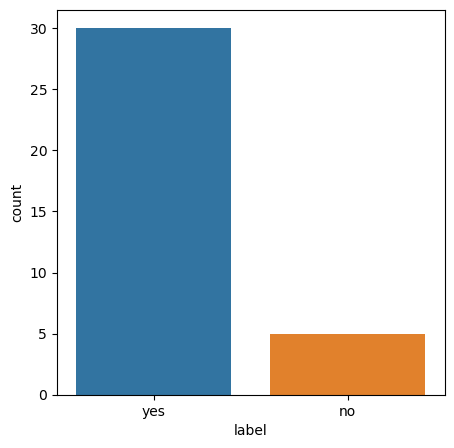

Final corpus for ./final_corpus/final_corpus_synesthesia_yes_no.csv successfully written to csv file.
----------------------------------------------



In [11]:
dataframes = [final_corpus_df]
file_names = ['./final_corpus/final_corpus_synesthesia_yes_no.csv']
visualize_and_write_final_df(dataframes, file_names)

## Compute IAA on final corpus

In [13]:
filtered_df = df[df['instance'].isin(final_corpus_df['instance'])]

#Cohen's Kappa
analyze_all_cases(filtered_df, columns)
print()
#Fleiss Kappa
analyze_all_cases(filtered_df, columns,iaa='fleiss')
print()
#Observed Agreement
analyze_all_cases(filtered_df, columns,iaa='oa')

All instances' Cohen's kappa and IAA (all cases):

Cohen's kappa between R and H: 1.0
Cohen's kappa between R and A: 1.0
Cohen's kappa between R and annotator-llm: 0.12
Cohen's kappa between H and A: 1.0
Cohen's kappa between H and annotator-llm: 0.12
Cohen's kappa between A and annotator-llm: 0.12

Inter-Annotator Agreement (Cohen's kappa) score - all cases: 0.56
----------------------------------------------

Inter-Annotator Agreement (Fleiss Kappa) score - all cases: 0.5
----------------------------------------------

All instances' Observed Agreement and IAA (all cases):

Observed agreement between R and H: 1.0
Observed agreement between R and A: 1.0
Observed agreement between R and annotator-llm: 0.71
Observed agreement between H and A: 1.0
Observed agreement between H and annotator-llm: 0.71
Observed agreement between A and annotator-llm: 0.71

Inter-Annotator Agreement (Observed Agreement) score - all cases: 0.86
----------------------------------------------


## Save IAA for future use

In [14]:
# Save the current standard output
original_stdout = sys.stdout

# Specify the file path where you want to save the output
output_file_path = 'iaa.txt'

# Open the file in write mode
with open(output_file_path, 'w') as f:
    # Redirect standard output to the file
    sys.stdout = f
    print("IAA on Linguistic Synesthesia - Yes or No Final Corpus")
    print()
    # Call the function
    analyze_all_cases(filtered_df, columns)
    analyze_all_cases(filtered_df, columns,iaa='fleiss')
    analyze_all_cases(filtered_df, columns,iaa='oa')
    print("----------------------------------------------")

# Restore the original standard output
sys.stdout = original_stdout

print(f"IAA function output saved to {output_file_path}")

IAA function output saved to iaa.txt
